<a href="https://colab.research.google.com/github/krakowiakpawel9/convnet-course/blob/master/03_mnist_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trenowanie prostej sieci neuronowej na zbiorze MNIST

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import warnings
warnings.filterwarnings('ignore')

### Załadowanie danych

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Eksploracja danych


In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba dabych treningowych:', X_train.shape[0])
print('Liczba danych testowych:', X_test.shape[0])
print('Rozmiar pojedynczego obrazka:', X_train[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba dabych treningowych: 60000
Liczba danych testowych: 10000
Rozmiar pojedynczego obrazka: (28, 28)


### Wyświetlenie obrazka

(-0.5, 27.5, 27.5, -0.5)

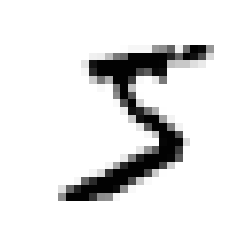

In [39]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.axis('off')

### Wyświetlenie kilku obrazków

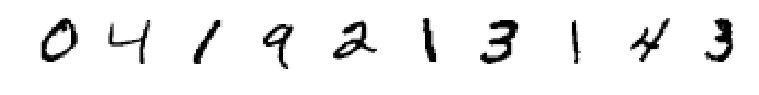

In [43]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i], cmap='Greys')
plt.show()

### Wyświetlenie danych

[  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


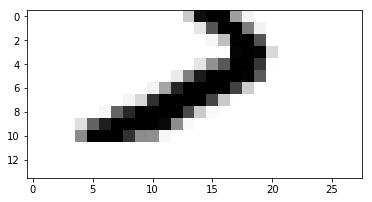

In [84]:
print(X_train[0][10])

# dolna połówka obrazka
plt.imshow(X_train[0][14:], cmap='Greys')

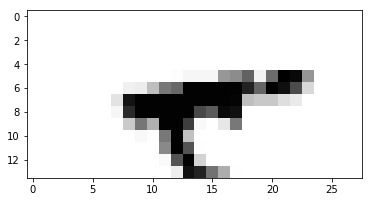

In [83]:
# górna połówka obrazka
plt.imshow(X_train[0][:14], cmap='Greys')

### Przycinanie obrazka

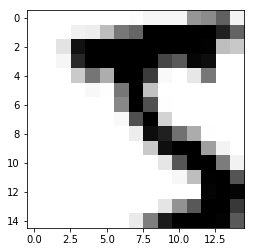

In [82]:
plt.imshow(X_train[0][5:20, 5:20], cmap='Greys')

### Wyświetlenie etykiet

In [6]:
print('y_train:', y_train)
print('y_train shape:', y_train.shape)

y_train: [5 0 4 ... 5 6 8]
y_train shape: (60000,)


## Przygotowanie danych

In [7]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### Przygotowanie etykiet 

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)
(10,)
(10,)


In [9]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Budowa modelu

In [10]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

W0711 06:39:17.977614 140000276723584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 06:39:18.017816 140000276723584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 06:39:18.024264 140000276723584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 06:39:18.040998 140000276723584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0711 06:39:18.050017 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Kompilacja modelu

In [11]:
model.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

W0711 06:40:55.068041 140000276723584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0711 06:40:55.081679 140000276723584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### Trenowanie modelu

In [12]:
history = model.fit(X_train, y_train,
                   batch_size=128,
                   epochs=20,
                   validation_data=(X_test, y_test))

W0711 06:42:14.251741 140000276723584 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2464 - acc: 0.9244 - val_loss: 0.1210 - val_acc: 0.9618
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.1036 - acc: 0.9687 - val_loss: 0.0926 - val_acc: 0.9704
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0742 - acc: 0.9770 - val_loss: 0.0739 - val_acc: 0.9780
Epoch 4/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0610 - acc: 0.9817 - val_loss: 0.0824 - val_acc: 0.9754
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0500 - acc: 0.9850 - val_loss: 0.0842 - val_acc: 0.9786
Epoch 6/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0452 - acc: 0.9868 - val_loss: 0.0782 - val_acc: 0.9788
Epoch 7/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0402 - acc: 0.9878 - val_loss: 0.0692 - val_acc

### Ocena modelu

In [16]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 39us/step
Test loss: 0.10232193803632797
Test accuracy: 0.9834
